# `Hierarchical Clustering -------------------------------`
### [Hierarchical Clustering Analytics Vidhya](https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/)

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv("Mall_Customers.csv")

In [5]:
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
data.drop("CustomerID",inplace=True,axis=1)

In [7]:
data

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [8]:
data.isnull().sum()

Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

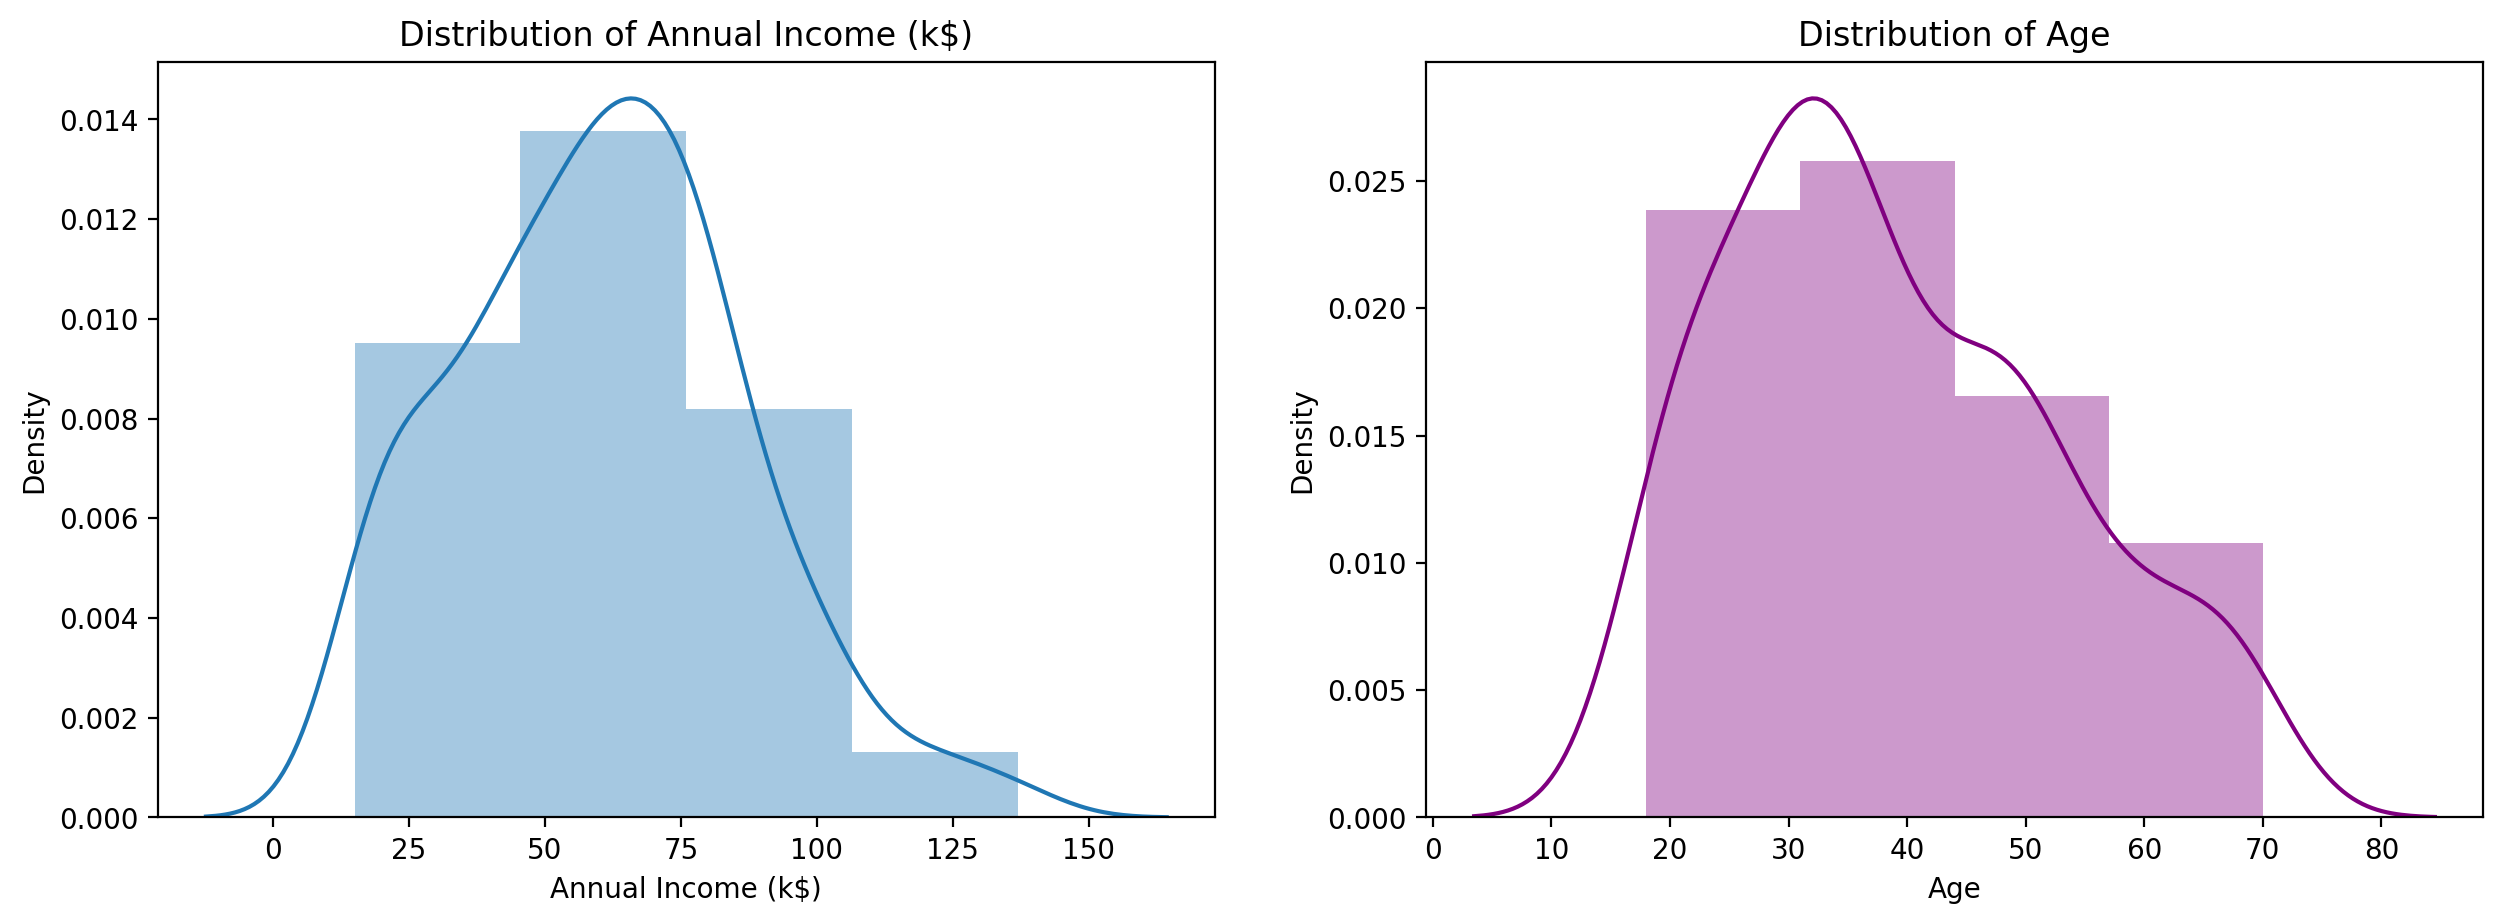

In [9]:
plt.figure(figsize=(15,5), dpi = 200)

plt.subplot(121)
sns.distplot(data['Annual Income (k$)'], bins = 4)
plt.title('Distribution of Annual Income (k$)')

plt.subplot(122)
sns.distplot(data['Age'], color='purple', bins = 4)
plt.title('Distribution of Age')


plt.show();

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Density'>

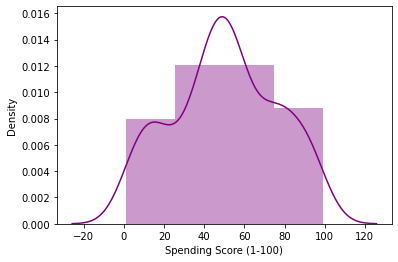

In [10]:
sns.distplot(data['Spending Score (1-100)'],color='purple', bins = 4)


In [12]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
data["Genre"] = lb.fit_transform(data["Genre"])

In [13]:
data

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


### `Dendrogran ------------------------`

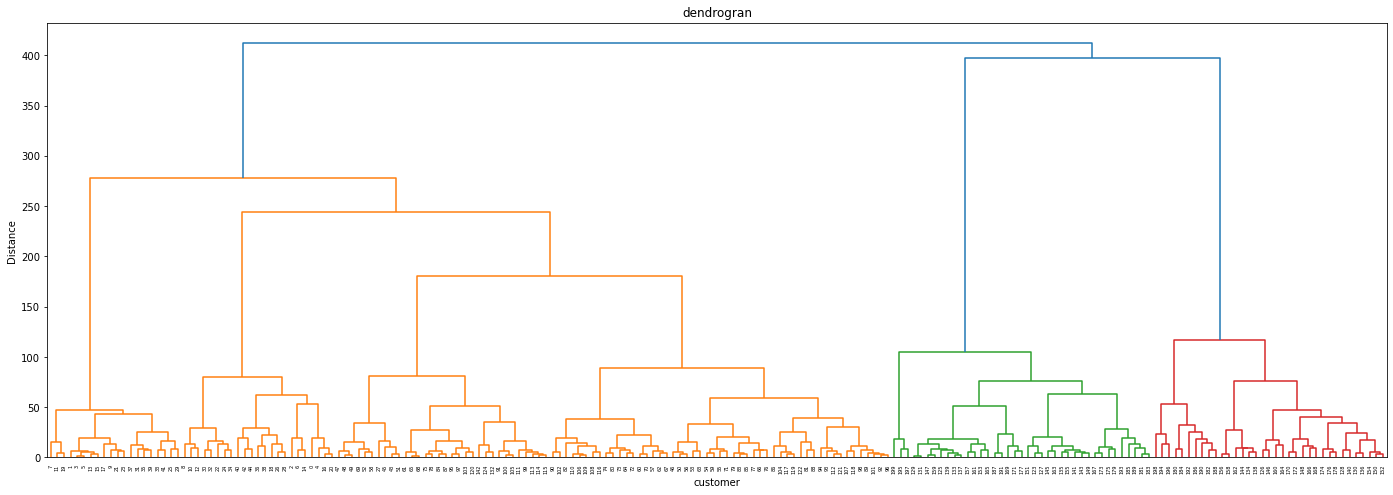

In [14]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(24,8))
dend = sch.dendrogram(sch.linkage(data,method="ward"))
plt.title("dendrogran")
plt.xlabel("customer")
plt.ylabel("Distance")
plt.show()

In [22]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
agg.fit(data)
clusterr_id = agg.fit_predict(data)

In [23]:
X = data[["Annual Income (k$)","Spending Score (1-100)"]].values
y= clusterr_id

### `Plotting ---------------------`

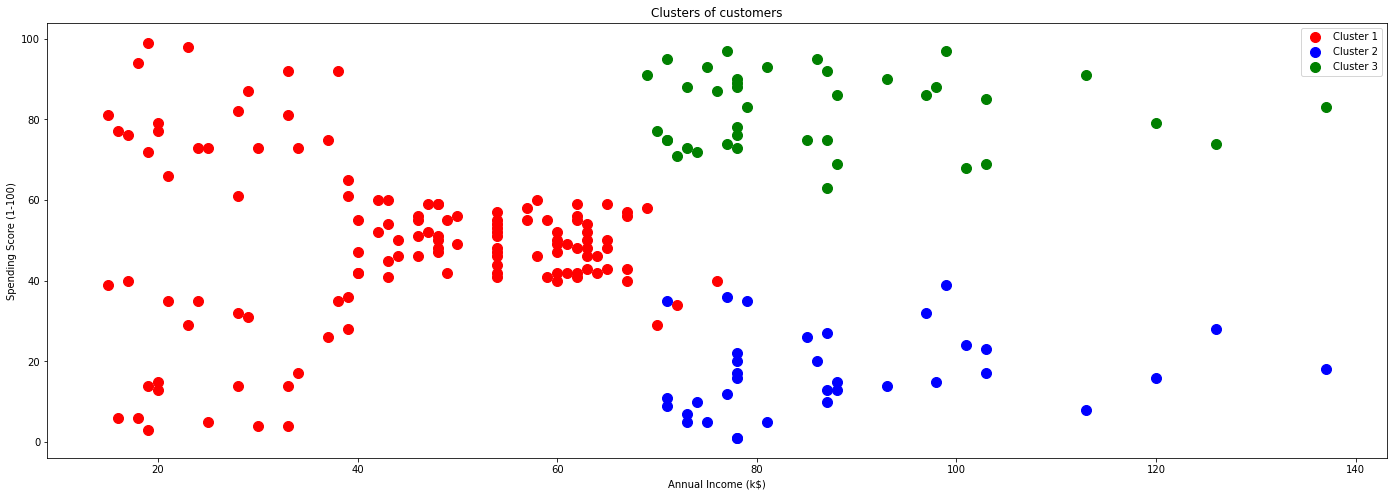

In [28]:
plt.figure(figsize=(24,8))
plt.scatter(X[y == 0, 0], X[y == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y == 1, 0], X[y == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y == 2, 0], X[y == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
# plt.scatter(X[y == 3, 0], X[y == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
# plt.scatter(X[y == 4, 0], X[y == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
# plt.scatter(X[y == 5, 0], X[y == 5, 1], s = 100, c = 'magenta', label = 'Cluster 6')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [25]:
import plotly.express as px

In [26]:
data["cluster_id"]  = y

In [27]:
px.scatter_3d(data,x="Annual Income (k$)",y="Spending Score (1-100)",z="Age",color="cluster_id")

### `Documentation`

In [21]:
# ??AgglomerativeClustering